# Gender Classification 

## Data Collection

- The dataset is collected from [kaggle](https://www.kaggle.com/mustafaali96/weight-height).
- The dataset consists of a CSV file name `weight-height.csv`.

- This dataset consists of three columns which is Height, Weight and Gender.
- In this project we are going to classify person's gender based on his/her height and weight.
- Our goal is to train a model with the given data to classify gender.
- Let's look more into the data



In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [19]:
# Loading Dataset
wh = pd.read_csv('weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
print('Our Data has {} samples.'.format(wh.shape[0]))

Our Data has 10000 samples.


## Feature Engineering

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


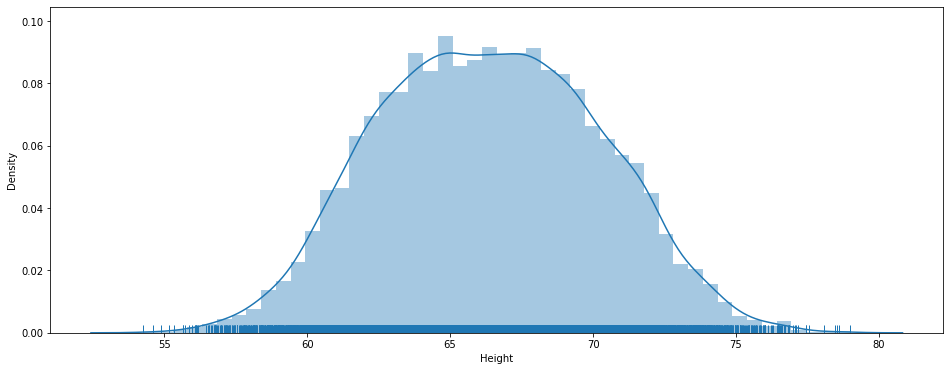

In [21]:
# Let's see the distribution of height
plt.figure(figsize=(16, 6))
sb.distplot(wh['Height'], rug = True)
plt.savefig('height_distribution.png')

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


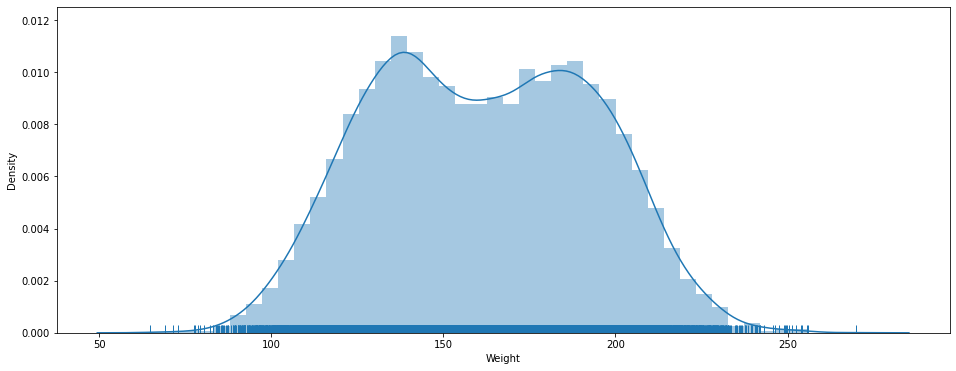

In [22]:
# Let's see the distribution of weight
plt.figure(figsize=(16, 6))
sb.distplot(wh['Weight'], rug = True)
plt.savefig('weight_distribution.png')

<Figure size 1152x432 with 0 Axes>

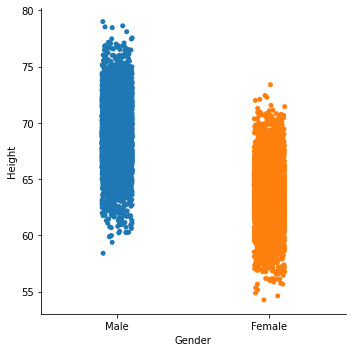

In [23]:
# Let's see the distribution of gender
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Height', data = wh)
plt.savefig('gender_height.png')

<Figure size 1152x432 with 0 Axes>

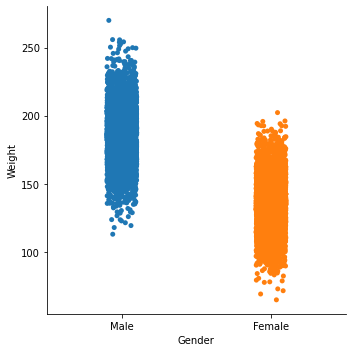

In [24]:
# Let's see the distribution of gender
plt.figure(figsize=(16, 6))
sb.catplot(x = 'Gender', y = 'Weight', data = wh)
plt.savefig('gender_weight.png')

## Feature Observations

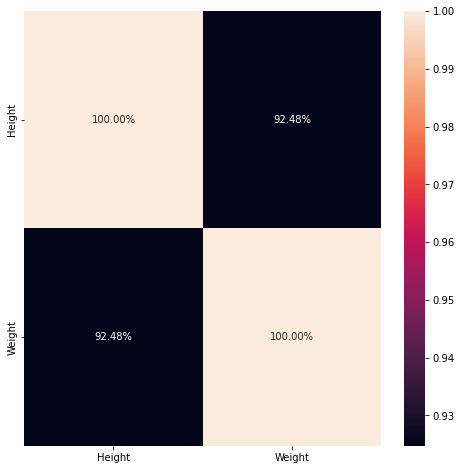

In [25]:
plt.figure(figsize=(8, 8))
sb.heatmap(wh[['Height', 'Weight']].corr(), annot=True, fmt='.2%')
plt.savefig('feature-correlaion.png')

<Figure size 720x576 with 0 Axes>

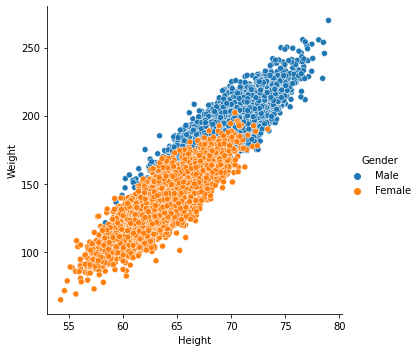

In [26]:
# Let's visualize the dataset
plt.figure(figsize = (10, 8))
sb.relplot(x = 'Height', y = 'Weight', data = wh, hue = 'Gender')
plt.savefig('feature-relations.png')

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = wh.iloc[:, [1, 2]].values
y = wh.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
clf.fit(X_train, y_train)-

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [28]:
print("Training Score : ", clf.score(X_train, y_train) * 100)
print("Testing Score : ", clf.score(X_test, y_test) * 100)

Training Score :  91.47142857142858
Testing Score :  91.9


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      Female       0.92      0.91      0.92      1463
        Male       0.92      0.92      0.92      1537

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [32]:
clf.predict_proba([[64, 152]])

array([[0.80288753, 0.19711247]])

In [42]:
hl=pd.read_csv('newdata.csv')
hl.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [43]:
X = wh.iloc[:, [1, 2]].values
y = wh.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20)
lf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability = True))
lf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [44]:
print("Training Score : ", lf.score(X_train, y_train) * 100)
print("Testing Score : ", lf.score(X_test, y_test) * 100)

Training Score :  91.41428571428571
Testing Score :  92.16666666666666
